In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor

In [2]:
# Génération des données à modéliser
np.random.seed(43)

# Le modèle de référence est une quadratiqu avec les coefficients suivants;
coeffs = [0.03, 0.2, -2]

# Niveau de bruit gaussien
sigma = 0.2

x_min = -2.5
x_max = 10.
xx = np.linspace(x_min,x_max,100)[:,np.newaxis]

# Génère des données distribuées aléatoirement en x
def generate_data(N):
    x = np.random.uniform(x_min,x_max,N)
    y = np.polyval(coeffs,x) + np.random.normal(0.0, sigma, N)

    return x, y

# Génération des données. Ne pas utiliser trop de données car les fits deviennent de plus en plus semblables
N = 7
x,y = generate_data(N)

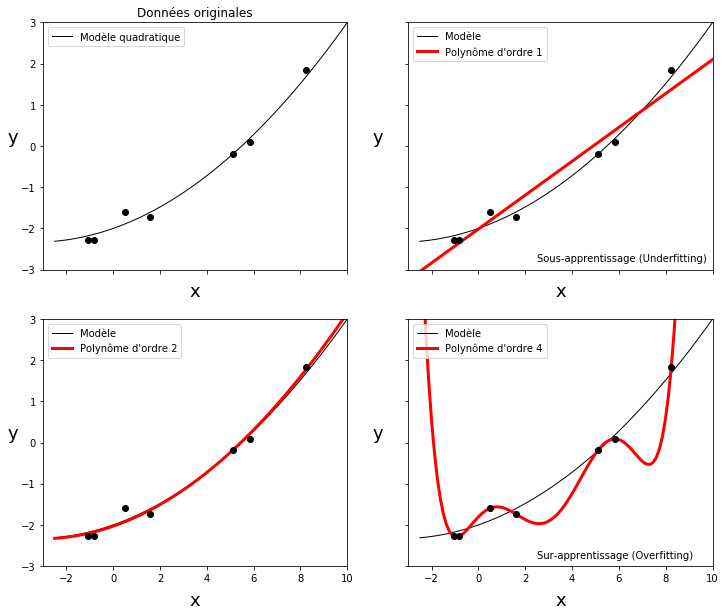

In [3]:
# Affichage des résultats. On compare le modèle original avec trois fits polynomiaux d'ordres 1, 2, et 6
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,sharex=True,sharey=True,figsize=(12,10))

yy0 = np.polyval(coeffs,xx)
ax1.plot(xx, yy0, color='black', linewidth=1)
ax1.plot(x, y, 'o', color='black')
ax1.set_title('Données originales')
ax1.set_ylabel('y',rotation=0,fontsize=18)
ax1.set_xlabel('x',fontsize=18)
ax1.yaxis.set_label_coords(-0.1,0.5)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_xlim(-3., 10.)
ax1.set_ylim(-3., 3.)
ax1.legend(['Modèle quadratique'], loc='upper left')



c = np.polyfit(x, y, 1)
yy = np.polyval(c,xx)
ax2.plot(xx, yy0, color='black', linewidth=1)
ax2.plot(xx, yy, color='red', linewidth=3)
ax2.plot(x, y, 'o', color='black')
ax2.set_ylabel('y',rotation=0,fontsize=18)
ax2.set_xlabel('x',fontsize=18)
ax2.yaxis.set_label_coords(-0.1,0.5)
ax2.xaxis.set_label_coords(0.5, -0.05)
ax2.legend(['Modèle',"Polynôme d'ordre 1"], loc='upper left')
ax2.text(2.5, -2.8, "Sous-apprentissage (Underfitting)", fontsize=10)
        
c = np.polyfit(x, y, 2)
yy = np.polyval(c,xx)
ax3.plot(xx, yy0, color='black', linewidth=1)
ax3.plot(xx, yy, color='red', linewidth=3)
ax3.plot(x, y, 'o', color='black')
ax3.set_ylabel('y',rotation=0,fontsize=18)
ax3.set_xlabel('x',fontsize=18)
ax3.yaxis.set_label_coords(-0.1,0.5)
ax3.xaxis.set_label_coords(0.5, -0.1)
ax3.legend(['Modèle',"Polynôme d'ordre 2"], loc='upper left')

c = np.polyfit(x, y, 6)
yy = np.polyval(c,xx)
ax4.plot(xx, yy0, color='black', linewidth=1)
ax4.plot(xx, yy, color='red', linewidth=3)
ax4.plot(x, y, 'o', color='black')
ax4.set_ylabel('y',rotation=0,fontsize=18)
ax4.set_xlabel('x',fontsize=18)
ax4.yaxis.set_label_coords(-0.1,0.5)
ax4.xaxis.set_label_coords(0.5, -0.1)
ax4.legend(['Modèle',"Polynôme d'ordre 4"], loc='upper left')
ax4.text(2.5, -2.8, "Sur-apprentissage (Overfitting)", fontsize=10)

plt.savefig('Figure_10_15.svg', format='svg')

